## 1-3. Multiqubit representation

So far we have studied the description of the state of a single qubit and its operations (arithmetic operations). To conclude this chapter, let's learn about the description of the state when there are $n$ qubits. It is complicated because of many tensor products, but you can learn it while playing around with the code.

The state of $n$ **classical** bits is represented by $n$ $0,1$ numbers, and the total number of patterns is $2^n$.
Since quantum mechanics allows superposition states of all these patterns, the state of $n$ **quantum** bits $|\psi \rangle$ is described by $2^n$ complex probability amplitudes like $c_{00...0}$, $c_{00...1}$ , and so on. 


$$
\begin{eqnarray}
|\psi \rangle &= & 
c_{00...0} |00...0\rangle +
c_{00...1} |00...1\rangle + \cdots +
c_{11...1} |11...1\rangle =
\left(
\begin{array}{c}
c_{00...0}
\\
c_{00...1}
\\
\vdots
\\
c_{11...1}
\end{array}
\right).
\end{eqnarray}
$$

Please note that the Complex probability amplitudes are normalized.

$$\sum _{i_1,..., i_n} |c_{i_1...i_n}|^2=1$$

When the quantum state of $n$ quantum bits are measured, we get bit array $i_1 ... i_n$ randomly with the following probability.

$$
\begin{eqnarray}
p_{i_1 ... i_n} &=&|c_{i_1 ... i_n}|^2
\label{eq02}
\end{eqnarray}
$$

and the post measure state is $|i_1 \dotsc i_n\rangle$. 

**Thus, the state of an *$n$* qubit must be described by a *$2^n$* dimensional complex vector that is exponentially large with respect to *$n$*, and here the difference between a classical bit and a qubit is strikingly apparent**.
And operations on $n$ qubit systems are represented as unitary matrices of $2^n \times 2^n$ dimensions.   
In other words, a quantum computer is a computer that unitarily transforms a complex vector of exponential size with respect to the number of qubits according to the laws of physics.

*Note here the relationship between the order and notation of multiple qubits. When describing states in kets, the 0s and 1s corresponding to the states of the "first" qubit, the "second" qubit, and so on ...... were notated in order from left to right. For example, if you write $|011\rangle$, it represents a state where the first qubit is 0, the second qubit is 1, and the third qubit is 1. On the other hand, if we look at the number 011 as a binary number, the upper bits are on the left and the lower bits are on the right. That is, the leftmost 0 corresponds to the most significant bit, the $2^2$, the middle 1 to the $2^1$, and the rightmost 1 to the least significant bit, the $2^0=1$. In other words, the "$i$th" qubit corresponds to the $n-i+1$th digit of the $n$-digit binary notation. This should be taken care of when dealing with multiple qubits in packages such as SymPy (see also "Tensor Products of Operators Using SymPy" below).

(See `1.2.1 Multiple qbits` in Nielsen-Chuang for details.)

### Example：2 quantum bits case

In the case of a two-qubit, there are four possible superpositions of the states 00, 01, 10, and 11, so the states can be written

$$
c_{00} |00\rangle + c_{01} |01\rangle + c_{10}|10\rangle + c_{11} |11\rangle  = 
\left( 
\begin{array}{c}
c_{00}
\\
c_{01}
\\
c_{10}
\\
c_{11}
\end{array}
\right)
$$


On the other hand, operations on 2 qubits can be written in $4 \times 4$ matrices, where each column and each row corresponds to $\langle00|,\langle01|,\langle10|,\langle11|, |00\rangle,|01\rangle,|10\rangle,$ <span style="color:red"> $|11\rangle$ </span>.    
The most important operation acting on such two-qubit is the **controlled NOT operation (CNOT operation)** .
The matrix representation is below.

$$
\begin{eqnarray}
\Lambda(X) =
\left(
\begin{array}{cccc}
1 & 0 & 0& 0
\\
0 & 1 & 0& 0
\\
0 & 0 & 0 & 1
\\
0 & 0 & 1& 0
\end{array}
\right)
\end{eqnarray}
$$

Let's see how the CNOT operation works on two qubits. First, if the first qubit is $|0\rangle$, <span style="color:red">the possibility that the first qubit is $|1\rangle$ is 0 </span>. Therefore, $c_{10} = c_{11} = 0$,

$$
\Lambda(X)
\left(
\begin{array}{c}
c_{00}\\
c_{01}\\
0\\
0
\end{array}
\right) =
\left(
\begin{array}{c}
c_{00}\\
c_{01}\\
0\\
0
\end{array}
\right)
$$

Also, the state do not change <span style="color:red"> when $\Lambda(X)$ is applied </span>. On the other hand, if the first qubit is $|1\rangle$, then $c_{00} = c_{01} = 0$ .

$$
\Lambda(X)
\left(
\begin{array}{c}
0\\
0\\
c_{10}\\
c_{11}
\end{array}
\right) =
\left(
\begin{array}{c}
0\\
0\\
c_{11}\\
c_{10}
\end{array}
\right)
$$

The probability amplitudes of the $|10\rangle$ and $|11\rangle$ are swapped. In other words, the second qubit is inverted.

In other words, the CNOT operation keeps the first qubit intact.

- If the first qubit is $|0\rangle$, nothing is done to the second qubit (the identity operation $I$ acts).
- If the first qubit is $|1\rangle$, the second qubit is flipped ($X$ acts)

Therefore, the first qubit is called the **control qubit** and the second qubit is called the **target qubit**.

When $\oplus$ is the addition of mod 2, i.e., the exclusive OR (XOR) in classical computation, the action of this CNOT operation is given by 

$$
\begin{eqnarray}
\Lambda(X) |ij \rangle = |i \;\; (i\oplus j)\rangle \:\:\: (i,j=0,1)
\end{eqnarray}
$$


<span style="color:red">
Conversely, if the second qubit is the control qubit and the first qubit is the target qubit, we can write
</span>

$$
\begin{eqnarray}
\color{red}{\Lambda(X) |ij \rangle = |(i\oplus j) \;\;  j\rangle \:\:\: (i,j=0,1)}
\end{eqnarray}
$$

Thus, the CNOT operation can be regarded as an invertible version of XOR in classical computation
(Note that the unitary matrix is invertible by definition $U^\dagger U = U U^\dagger = I$).
For example, let the first qubit is superposition of $|0\rangle$ and $|1\rangle$, and the second qubit is $|0\rangle$. Then

$$
\begin{eqnarray}
\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle )\otimes |0\rangle =
\frac{1}{\sqrt{2}}
\left(
\begin{array}{c}
1
\\
0
\\
1
\\
0
\end{array}
\right)
\end{eqnarray}
$$

When CNOT is applied, 

$$
\begin{eqnarray}
\frac{1}{\sqrt{2}}( |00\rangle + |11\rangle ) =
\frac{1}{\sqrt{2}}
\left(
\begin{array}{c}
1
\\
0
\\
0
\\
1
\end{array}
\right)
\end{eqnarray}
$$

we get a superposition of $|00\rangle$ and $|11\rangle$. At $ |00\rangle$, the second qubit is intact, while at $ |11\rangle$, the second qubit is inverted from $ |0\rangle$ to  $ |1\rangle$. (See next section for the symbol $\otimes$.)

Furthermore, the CNOT gate can be combined to create an important two-qubit gate, the **SWAP gate**.

A CNOT gate with the $i$-th qubit as the control and the $j$-th qubit as the target can be written as follows.

$$\Lambda(X)_{i,j}$$

By using this, SWAP gate can be written as 

$$
\begin{align}
\mathrm{SWAP} &= \Lambda(X)_{1,2} \Lambda(X)_{2,1} \Lambda(X)_{1,2}\\
&=
\left(
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{array}
\right)
\left(
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{array}
\right)
\left(
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{array}
\right)\\
&=
\left(
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{array}
\right)
\end{align}
$$

We see that this is the gate which exchanges the first qubit with the second qubit.

This can be easily verified by the notation above using the addition $\oplus$ of mod 2. The action of the three CNOT gates $\Lambda(X)_{1,2} \Lambda(X)_{2,1} \Lambda(X)_{1,2}$ on the $|ij\rangle$ can be written down step by step, using $i \oplus (i \oplus j) = (i \oplus i) \oplus j = 0 \oplus j = j$.

$$
\begin{align}
|ij\rangle &\longrightarrow
|i \;\; (i\oplus j)\rangle\\
&\longrightarrow
|(i\oplus (i\oplus j)) \;\; (i\oplus j)\rangle =
|j \;\; (i\oplus j)\rangle\\
&\longrightarrow
|j \;\; (j\oplus (i\oplus j))\rangle =
|ji\rangle
\end{align}
$$


We see that this is the gate which swaps two qubits.

(See Nielsen-Chuang `1.3.2 Multiple qbit gates` for detail)

### Calculating Tensor Products
In hand and analytical calculations, the **tensor product** ($\otimes$) is a powerful tool.
This gives us the rules for the calculation of how, given multiple qubits, to transform them into a large single vector we saw above.

In quantum mechanics, when you have two quantum systems, each in the states $|\psi \rangle$ and $|\phi \rangle$, we express this as follows.


$$
|\psi \rangle \otimes |\phi\rangle
$$

The tensor product $\otimes$ is used to express the state. Such a system consisting of multiple quantum systems is called a **composite system**. For example, a two-qubit system is a composite system.


Basically, tensor products may be computed by the same rules of computation as **polynomials**.

For example, calculation can be done this way.

$$ 
(\alpha |0\rangle + \beta |1\rangle )\otimes (\gamma |0\rangle + \delta |1\rangle )
= \alpha \gamma |0\rangle |0\rangle + \alpha \delta |0\rangle |1\rangle + \beta \gamma |1 \rangle | 0\rangle + \beta \delta |1\rangle |1\rangle 
$$

In column vector representation, we get the 4-dimensional vectors corresponding to $|00\rangle$, $|01\rangle$, $|10\rangle$, $|11\rangle$ .

$$
\left(
\begin{array}{c}
\alpha
\\
\beta
\end{array}
\right)
\otimes 
\left(
\begin{array}{c}
\gamma
\\
\delta
\end{array}
\right) =
\left(
\begin{array}{c}
\alpha \gamma
\\
\alpha \delta
\\
\beta \gamma
\\
\beta \delta
\end{array}
\right)
$$

### Tensor product calculation using SymPy

In [1]:
from IPython.display import Image, display_png
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP, CPHASE
init_printing() # to show vectors and matrices nicely

In [2]:
#Please run only on Google Colaboratory

from IPython.display import HTML
def setup_mathjax():
    display(HTML('''
    <script>
        if (!window.MathJax && window.google && window.google.colab) {
            window.MathJax = {
                'tex2jax': {
                    'inlineMath': [['$', '$'], ['\\(', '\\)']],
                    'displayMath': [['$$', '$$'], ['\\[', '\\]']],
                    'processEscapes': true,
                    'processEnvironments': true,
                    'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
                    'displayAlign': 'center',
                },
                'HTML-CSS': {
                    'styles': {'.MathJax_Display': {'margin': 0}},
                    'linebreaks': {'automatic': true},
                    // Disable to prevent OTF font loading, which aren't part of our
                    // distribution.
                    'imageFont': null,
                },
               'messageStyle': 'none'
            };
            var script = document.createElement("script");
            script.src = "https://colab.research.google.com/static/mathjax/MathJax.js?config=TeX-AMS_HTML-full,Safe";
            document.head.appendChild(script);
        }
    </script>
    '''))
get_ipython().events.register('pre_run_cell', setup_mathjax)

In [3]:
a,b,c,d = symbols('alpha,beta,gamma,delta')
psi = a*Qubit('0')+b*Qubit('1')
phi = c*Qubit('0')+d*Qubit('1')

In [4]:
TensorProduct(psi, phi) #tensor product

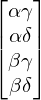

In [5]:
represent(TensorProduct(psi, phi))

Furthermore, calculating the tensor product of this vector and $|\psi\rangle$, we get an 8-dimensional vector

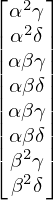

In [6]:
represent(TensorProduct(psi,TensorProduct(psi, phi)))

### Tensor product of operators

The tensor product can be used to express which qubit an operator acts on. For example, if we want to apply the operator $A$ to the first qubit and the operator $B$ to the second qubit, then tensor product operator is given as follows 

$$ A \otimes B$$

Let $A$ and $B$ be 2×2 matrices, respectively, then $A\otimes B$ is a 4×4 matrix.

$$
\left(
\begin{array}{cc}
a_{11} & a_{12}
\\
a_{21} & a_{22}
\end{array}
\right)
\otimes 
\left(
\begin{array}{cc}
b_{11} & b_{12}
\\
b_{21} & b_{22}
\end{array}
\right) =
\left(
\begin{array}{cccc}
a_{11} b_{11} & a_{11} b_{12} & a_{12} b_{11} & a_{12} b_{12}
\\
a_{11} b_{21} & a_{11} b_{22} & a_{12} b_{21} & a_{12} b_{22}
\\
a_{21} b_{11} & a_{21} b_{12} & a_{22} b_{11} & a_{22} b_{12}
\\
a_{21} b_{21} & a_{21} b_{22} & a_{22} b_{21} & a_{22} b_{22}
\end{array}
\right)
$$

When $ A \otimes B$ transforms the following Tensor product,

$$|\psi \rangle \otimes | \phi \rangle $$ 

we get

$$ (A|\psi \rangle ) \otimes (B |\phi \rangle )$$


$A$ and $B$ act on each of the subsystems $|\psi \rangle$ and $|\phi\rangle$, respectively.
For addition, we can expand it like a polynomial.

$$
(A+C)\otimes (B+D) |\psi \rangle \otimes | \phi \rangle =
(A \otimes B +A \otimes D + C \otimes B + C \otimes D) |\psi \rangle \otimes | \phi \rangle\\ =
(A|\psi \rangle) \otimes (B| \phi \rangle)
+(A|\psi \rangle) \otimes (D| \phi \rangle)
+(C|\psi \rangle) \otimes (B| \phi \rangle)
+(C|\psi \rangle) \otimes (D| \phi \rangle)
$$

Tensor products and tensor product operators are written horizontally on the left and right, but it may actually be easier to understand how they work if they are arranged vertically.

$$
\left(
\begin{array}{c}
A
\\
\otimes 
\\
B
\end{array}
\right)
\begin{array}{c}
|\psi \rangle 
\\
\otimes 
\\
|\phi\rangle
\end{array}
$$

For example, the entangle state created using the CNOT operation is

$$
\left(
\begin{array}{c}
|0\rangle \langle 0|
\\
\otimes 
\\
I
\end{array}
+
\begin{array}{c}
|1\rangle \langle 1|
\\
\otimes 
\\
X
\end{array}
\right)
\left(
\begin{array}{c}
\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
\\
\otimes 
\\
|0\rangle
\end{array}
\right) =
\frac{1}{\sqrt{2}}\left(
\begin{array}{c}
|0 \rangle 
\\
\otimes 
\\
|0\rangle
\end{array}
+
\begin{array}{c}
|1 \rangle 
\\
\otimes 
\\
|1\rangle
\end{array}
\right)
$$

### Tensor product of operators using SymPy
When using an operator in SymPy, always specify which digit the operator affects. Note that it is not "the **th**" but "the **digit**" in binary notation. When specifying the $i$th qubit from the left of the $n$ qubits with SymPy code, you should specify index `n-i` (Sympy index based on 0).

`H(0)` can be written as follows in one-qubit space

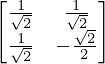

In [9]:
represent(H(0),nqubits=1)

In two-qubit space, it corresponds to $H \otimes I$, and its matrix representation is

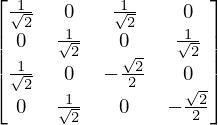

In [10]:
represent(H(1),nqubits=2)

CNOT operator is

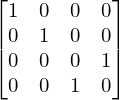

In [11]:
represent(CNOT(1,0),nqubits=2)

The tensor product of the Pauli operators $X \otimes Y \otimes Z$ is

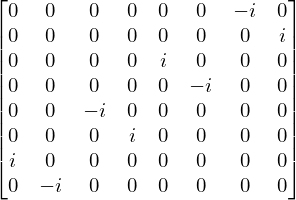

In [12]:
represent(X(2)*Y(1)*Z(0),nqubits=3)

In this way, the above tensor product rules can be tested.

### When only a part of multiple qubits are measured

The probability of the measurement result when all of the multiple qubits are measured has already been explained. It is also possible to measure only a part of the multiple qubits. In that case, the probability of the measurement result is the square of the length of the vector projected by the (subsystem) basis corresponding to the measurement result, and the state after the measurement is the normalized version of the projected vector.

Let's look at this in detail. Consider the following $n$-qubit states.

        
\begin{align}
|\psi\rangle &=
c_{00...0} |00...0\rangle +
c_{00...1} |00...1\rangle + \cdots +
c_{11...1} |11...1\rangle\\
&= \sum_{i_1 \dotsc i_n} c_{i_1 \dotsc i_n} |i_1 \dotsc i_n\rangle =
\sum_{i_1 \dotsc i_n} c_{i_1 \dotsc i_n} |i_1\rangle \otimes \cdots \otimes |i_n\rangle
\end{align}

Suppose we measure the first qubit, the projection operator on the orthonormal basis $|0\rangle$ and $|1\rangle$ of the state space of the first qubit can be written as $|0\rangle\langle0|$ and $|1\rangle\langle1|$ respectively. Operator that projects the first qubit onto the $|0\rangle$ and does nothing to the other qubits is 

$$
|0\rangle\langle0| \otimes I \otimes \cdots \otimes I
$$

With this operator, the probability of obtaining the measurement value 0 is

$$
\bigl\Vert \bigl(|0\rangle\langle0| \otimes I \otimes \cdots \otimes I\bigr) |\psi\rangle \bigr\Vert^2 =
\langle \psi | \bigl(|0\rangle\langle0| \otimes I \otimes \cdots \otimes I\bigr) | \psi \rangle
$$

Since

$$
\bigl(|0\rangle\langle0| \otimes I \otimes \cdots \otimes I\bigr) | \psi \rangle =
\sum_{i_2 \dotsc i_n} c_{0 i_2 \dotsc i_n} |0\rangle \otimes |i_2\rangle \otimes \cdots \otimes |i_n\rangle
$$

the probability of obtaining 0 is

$$
p_0 = \sum_{i_2 \dotsc i_n} |c_{0 i_2 \dotsc i_n}|^2
$$

and the post-measurement state is

$$
\frac{1}{\sqrt{p_0}}\sum_{i_2 \dotsc i_n} c_{0 i_2 \dotsc i_n} |0\rangle \otimes |i_2\rangle \otimes \cdots \otimes |i_n\rangle
$$

By interchanging 0 and 1, the probability of obtaining the measurement value 1 and the state after the measurement are obtained.

Let us note that the expressions for $p_0$ and $p_1$ obtained here coincide with the peripheral probability distribution of $i_1$ calculated from the simultaneous probability distribution $p_{i_1, \dotsc, i_n}$ of the measurement $i_1, \dotsc, i_n$. In fact,


$$
\sum_{i_2, \dotsc, i_n} p_{i_1, \dotsc, i_n} = \sum_{i_2, \dotsc, i_n} |c_{i_1, \dotsc, i_n}|^2 = p_{i_1}
$$

The same calculation can be done for measuring more qubits, for example, the first $k$ qubits. The probability of obtaining the measurement result $i_1, \dotsc, i_k$ is

$$
p_{i_1, \dotsc, i_k} = \sum_{i_{k+1}, \dotsc, i_n} |c_{i_1, \dotsc, i_n}|^2
$$

and the post-measurement state is

$$
\frac{1}{\sqrt{p_{i_1, \dotsc, i_k}}}\sum_{i_{k+1} \dotsc i_n} c_{i_1 \dotsc i_n} |i_1 \rangle \otimes \cdots \otimes |i_n\rangle
$$

(Note that only $i_{k+1},\cdots,i_n$ are summed up.)

Let's look at another example using SymPy. Here, we consider the following state created by combining the H and CNOT operations.

$$
|\psi\rangle = \Lambda(X) (H \otimes H) |0\rangle \otimes |0\rangle = \frac{|00\rangle + |10\rangle + |01\rangle + |11\rangle}{2}
$$

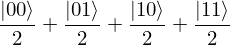

In [13]:
psi = qapply(CNOT(1, 0)*H(1)*H(0)*Qubit('00'))
psi

The probability of measuring the first qubit of this state and obtaining zero is

$$
p_0 = \langle \psi | \bigl( |0\rangle\langle0| \otimes I \bigr) | \psi \rangle =
\left(\frac{\langle 00 | + \langle 10 | + \langle 01 | + \langle 11 |}{2}\right)
\left(\frac{| 00 \rangle + | 01 \rangle}{2}\right) =
\frac{1}{2}
$$

and the post-measurement state is

$$
\frac{1}{\sqrt{p_0}} \bigl( |0\rangle\langle0| \otimes I \bigr) | \psi \rangle =
\frac{| 00 \rangle + | 01 \rangle}{\sqrt{2}}
$$

Let's calculate this result with SymPy as well. SymPy has several functions for measurements, and we can use `measure_partial` to calculate the probability of measuring some qubits and the state after the measurement. If you pass the state to be measured and the index of the qubit to be measured as arguments, the pairs of the state after the measurement and the probability of the measurement are output as a list. For the post-measurement state and probability when the first qubit is 0, just refer to the `[0]` element.

In [1]:
from sympy.physics.quantum.qubit import measure_all, measure_partial
measured_state_and_probability = measure_partial(psi, (1,))

In [ ]:
measured_state_and_probability[0]

It can be seen that the result is consistent with the result calculated manually above. If we do the same calculation for the case when the measurement result is 1, we have

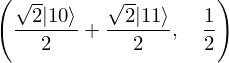

In [15]:
measured_state_and_probability[1]

---
## Column: What is a universal gate set?

It is known that in a classical computer, arbitrary logic operations can be performed by combining several NAND gates (the inverted output of a logical product AND).  
What, then, is the counterpart in quantum computation, i.e., what is the minimum quantum gate required to perform an arbitrary quantum computation?  
In fact, the following ones we have learned in this section

$$\{H, T, {\rm CNOT} \}$$  

is known to be the so-called **universal gate set** .  
By combining them well, arbitrary quantum computation can be performed, i.e., "**universal quantum computation**" is possible.  

### 【Note for those who want to know more details】

In the following, we will explain step by step how the three types of gates $\{H, T, {\rm CNOT} \}$ constitute a universal gate set.  
We will start with the general $N$ qubit unitary operation and break it down into finer components, and see how we finally arrive at the above three types of gates.

#### ◆ Decomposition of $n$-qubit unitary operations
First, any $n$-qubit unitary operation can be decomposed into several **1-qubit unitary operations** and **CNOT gates** via the following steps.  

1. Any $n$-qubit unitary operation can be decomposed into a product of several **2-level unitary operations**. Here, a 2-level unitary operation is a unitary operation that acts only on a 2-dimensional subspace of a $2^3=8$ dimensional space stretched over two bases (e.g., $\{|000\rangle, |111\rangle \}$) in the case of 3 qubits, as an example.
2. any two-level unitary operation can be composed of a **control**$U$**gate** (the NOT part of the CNOT gate is replaced by an arbitrary one-qubit unitary operation $U$) and a **Toffoli gate** (a generalized version of CNOT gate with two control qubits)

3. both the control $U$ gate and the Toffoli gate can be constructed from **one qubit unitary operation** and **CNOT gate**.

#### ◆ Composition of 1-qubit unitary operations
Furthermore, any 1-qubit unitary operation can be composed of $\{H, T\}$.

1. Arbitrary 1-qubit unitary operation can be realized (strictly) by a rotation gate $\{R_X(\theta), R_Z(\theta)\}$ from Euler's rotation angle law
2. In fact, any rotation on the Bloch sphere can be realized by using only $\{H, T\}$ (Note 1). This is due to the fact that rotation of an irrational multiple of $\pi$ about an axis can be realized from only $\{H, T\}$ (**Solovay-Kitaev algorithm**).
 
(Note 1) Some readers may wonder how a continuous rotation on the Bloch sphere can be realized by a discrete operation $\{H, T\}$. In fact, if one were to realize a strictly one-qubit unitary operation with discrete gate operations, an infinite number of gates would be required. In reality, however, it is not necessary to realize strict unitary operations, and it is sufficient to approximate arbitrary unitary operations with the required computational accuracy $\epsilon$. Here, the **Solovay-Kitaev theorem** [3] guarantees that by using polynomial number of $\{H, T\}$, arbitrary one-qubit unitary operations can be **approximately constructed with good enough accuracy**.


<br>
  
The above discussion shows that with three types of gates $\{H, T, {\rm CNOT} \}$, arbitrary $n$-qubit unitary operations can be realized.

For more details on universal gate sets and universal quantum computation, see:  
[1] Nielsen-Chuang's `4.5 universal quantum gates`.   
[2] Keisuke Fujii, "Fundamentals of quantum computers and their interface with physics" (Lecture at the 62nd Summer School for Young Physicists) DOI: 10.14989/229039 http://mercury.yukawa.kyoto-u.ac.jp/~bussei.kenkyu/archives/1274.html  
[3] For review, C. M. Dawson and M. A. Nielsen, "The Solovay-Kitaev algorithm", https://arxiv.org/abs/quant-ph/0505030